<a href="https://colab.research.google.com/github/harsh21051993/portfolio/blob/main/lead_dashboard_prep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sources
[link1](https://medium.com/pipeline-a-data-engineering-resource/3-data-science-projects-that-got-me-12-interviews-and-1-that-got-me-in-trouble-f376682b4e21)
[link2](https://medium.com/pipeline-a-data-engineering-resource/creating-the-dashboard-that-got-me-a-data-analyst-job-offer-de3f0d6b1771)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
from pathlib import Path as Path
from urllib import request

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

# set up to view all the info of the columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
#uni_names = request.urlretrieve("https://raw.githubusercontent.com/Hipo/university-domains-list/master/world_universities_and_domains.json", "uni.json")

In [ ]:
edxcourses_df = pd.read_csv('edxcourses_df.csv')
edxcourses_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   title               975 non-null    object
 1   summary             922 non-null    object
 2   n_enrolled          855 non-null    object
 3   course_type         975 non-null    object
 4   institution         975 non-null    object
 5   instructors         972 non-null    object
 6   Level               975 non-null    object
 7   subject             975 non-null    object
 8   language            975 non-null    object
 9   subtitles           972 non-null    object
 10  course_effort       975 non-null    object
 11  course_length       975 non-null    object
 12  price               975 non-null    object
 13  course_description  935 non-null    object
 14  course_syllabus     417 non-null    object
 15  course_url          975 non-null    object
dtypes: object(16)
memory usage

In [ ]:
numofsubjects = edxcourses_df['institution'].value_counts().sort_values(ascending=False)

In [ ]:
numofsubjects

Harvard University                                                                                          104
Universitat Politècnica de Valencia                                                                          47
Massachusetts Institute of Technology                                                                        41
IBM                                                                                                          30
Delft University of Technology                                                                               30
Inter-American Development Bank                                                                              29
The University of Queensland                                                                                 26
The University of Michigan                                                                                   22
Tecnológico de Monterrey                                                                                

In [ ]:
edxcourses_df['total_subjects'] = 0

In [ ]:
for i in range(len(edxcourses_df)):
  edxcourses_df['total_subjects'][i] = numofsubjects.at[edxcourses_df.loc[i].at["institution"]]

#numofsubjects.at["Chemistry"]

In [ ]:
edxcourses_df.head(10)

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url,total_subjects
0,How to Learn Online,Learn essential strategies for successful onli...,"124,980",Self-paced on your time,edX,Nina Huntemann-Robyn Belair-Ben Piscopo,Introductory,Education & Teacher Training,English,English,2–3 hours per week,2 Weeks,FREE-Add a Verified Certificate for $49 USD,"Designed for those who are new to elearning, t...",Welcome - We start with opportunities to meet ...,https://www.edx.org/course/how-to-learn-online,5
1,Programming for Everybody (Getting Started wit...,"This course is a ""no prerequisite"" introductio...","293,864",Self-paced on your time,The University of Michigan,Charles Severance,Introductory,Computer Science,English,English,2–4 hours per week,7 Weeks,FREE-Add a Verified Certificate for $49 USD,This course aims to teach everyone the basics ...,NaN,https://www.edx.org/course/programming-for-eve...,22
2,CS50's Introduction to Computer Science,An introduction to the intellectual enterprise...,"2,442,271",Self-paced on your time,Harvard University,David J. Malan-Doug Lloyd-Brian Yu,Introductory,Computer Science,English,English,6–18 hours per week,12 Weeks,FREE-Add a Verified Certificate for $90 USD,"This is CS50x , Harvard University's introduct...",NaN,https://www.edx.org/course/cs50s-introduction-...,104
3,The Analytics Edge,"Through inspiring examples and stories, discov...","129,555",Instructor-led on a course schedule,Massachusetts Institute of Technology,Dimitris Bertsimas-Allison O'Hair-John Silberh...,Intermediate,Data Analysis & Statistics,English,English,10–15 hours per week,13 Weeks,FREE-Add a Verified Certificate for $199 USD,"In the last decade, the amount of data availab...",NaN,https://www.edx.org/course/the-analytics-edge,41
4,Marketing Analytics: Marketing Measurement Str...,This course is part of a MicroMasters® Program,"81,140",Self-paced on your time,"University of California, Berkeley",Stephan Sorger,Introductory,Computer Science,English,English,5–7 hours per week,4 Weeks,FREE-Add a Verified Certificate for $249 USD,Begin your journey in a new career in marketin...,NaN,https://www.edx.org/course/marketing-analytics...,20
5,Introduction to Project Management,Learn the principles of project management and...,"301,793",Self-paced on your time,University of Adelaide,Frank Schultmann-Noel Lindsay-Anton Jordaan-Jo...,Introductory,Business & Management,English,English,2–3 hours per week,6 Weeks,FREE-Add a Verified Certificate for $199 USD,Project management is an essential skill-set f...,NaN,https://www.edx.org/course/introduction-to-pro...,17
6,Leading High-Performing Teams,"Learn how to motivate, engage and empower peop...","32,847",Self-paced on your time,The University of Queensland,Tyler G. Okimoto,Intermediate,Communication,English,English,8–10 hours per week,10 Weeks,FREE-Add a Verified Certificate for $5 USD,This course will blend business theory and rea...,MODULE 1: INTRODUCTION TO TEAMS\nFocuses on re...,https://www.edx.org/course/leading-high-perfor...,26
7,The Foundations of Happiness at Work,Learn why happiness at work matters and how to...,"67,073",Self-paced on your time,"University of California, Berkeley",Dacher Keltner-Emiliana Simon-Thomas,Introductory,Business & Management,English,English,2–3 hours per week,4 Weeks,FREE-Add a Verified Certificate for $199 USD,This course explains what happiness at work lo...,NaN,https://www.edx.org/course/the-foundations-of-...,20
8,"Managing Study, Stress and Mental Health at Un...",Develop a clearer understanding of what mental...,"23,061",Self-paced on your time,Curtin University,Ben Milbourn-Craig Thompson-Sonya Girdler-Fran...,Introductory,Health & Safety,English,English,1–3 hours per week,2 Weeks,FREE-Add a Verified Certificate for $49 USD,This short course is a German-Australian colla...,Module 1: Mental fitnessBy the end of this mod...,https:

In [ ]:
edxcourses_df['n_enrolled'] = edxcourses_df['n_enrolled'].str.replace(',','')
edxcourses_df['price'] = edxcourses_df['price'].str.replace('FREE-Add a Verified Certificate for', '')
edxcourses_df['price'] = edxcourses_df['price'].str.replace('$', '')
edxcourses_df['price'] = edxcourses_df['price'].str.replace('USD', '')
edxcourses_df['course_length'] = edxcourses_df['course_length'].str.replace('Weeks', '')

In [ ]:
edxcourses_df['n_enrolled'] = edxcourses_df['n_enrolled'].fillna(0)
edxcourses_df['n_enrolled'] = edxcourses_df['n_enrolled'].astype(int)
edxcourses_df['price'] = edxcourses_df['price'].astype(float)
edxcourses_df['course_length'] = edxcourses_df['course_length'].astype(int)
edxcourses_df.isna().sum()

title                   0
summary                53
n_enrolled              0
course_type             0
institution             0
instructors             3
Level                   0
subject                 0
language                0
subtitles               3
course_effort           0
course_length           0
price                   0
course_description     40
course_syllabus       558
course_url              0
total_subjects          0
dtype: int64

In [ ]:
edxcourses_df['summary'] = edxcourses_df['summary'].fillna('Unlisted')
edxcourses_df['instructors'] = edxcourses_df['instructors'].fillna('Unlisted')
edxcourses_df['subtitles'] = edxcourses_df['subtitles'].fillna('English')
edxcourses_df['course_description'] = edxcourses_df['course_description'].fillna('Unlisted')
edxcourses_df['course_syllabus'] = edxcourses_df['course_syllabus'].fillna('Unlisted')

del edxcourses_df['course_url']

edxcourses_df['Level'] = edxcourses_df['Level'].astype('category')
edxcourses_df['Level'] = edxcourses_df['Level'].cat.codes
edxcourses_df['course_type'] = edxcourses_df['course_type'].astype('category')
edxcourses_df['course_type'] = edxcourses_df['course_type'].cat.codes

edxcourses_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               975 non-null    object 
 1   summary             975 non-null    object 
 2   n_enrolled          975 non-null    int64  
 3   course_type         975 non-null    int8   
 4   institution         975 non-null    object 
 5   instructors         975 non-null    object 
 6   Level               975 non-null    int8   
 7   subject             975 non-null    object 
 8   language            975 non-null    object 
 9   subtitles           975 non-null    object 
 10  course_effort       975 non-null    object 
 11  course_length       975 non-null    int64  
 12  price               975 non-null    float64
 13  course_description  975 non-null    object 
 14  course_syllabus     975 non-null    object 
 15  total_subjects      975 non-null    int64  
dtypes: float

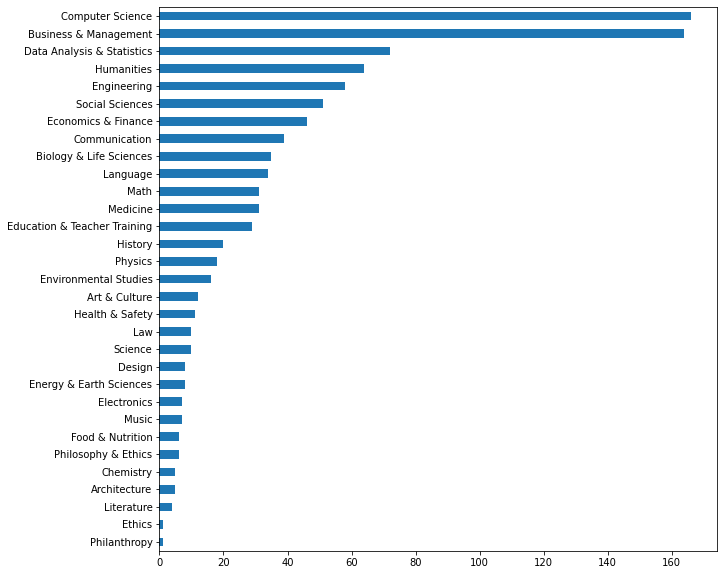

In [ ]:
edxcourses_df['subject'].value_counts().sort_values(ascending=True).plot(kind="barh", figsize=(10,10))
plt.show()

In [ ]:
edxcourses_df.head()

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,total_subjects
0,How to Learn Online,Learn essential strategies for successful onli...,124980,1,edX,Nina Huntemann-Robyn Belair-Ben Piscopo,2,Education & Teacher Training,English,English,2–3 hours per week,2,49.0,"Designed for those who are new to elearning, t...",Welcome - We start with opportunities to meet ...,5
1,Programming for Everybody (Getting Started wit...,"This course is a ""no prerequisite"" introductio...",293864,1,The University of Michigan,Charles Severance,2,Computer Science,English,English,2–4 hours per week,7,49.0,This course aims to teach everyone the basics ...,Unlisted,22
2,CS50's Introduction to Computer Science,An introduction to the intellectual enterprise...,2442271,1,Harvard University,David J. Malan-Doug Lloyd-Brian Yu,2,Computer Science,English,English,6–18 hours per week,12,90.0,"This is CS50x , Harvard University's introduct...",Unlisted,104
3,The Analytics Edge,"Through inspiring examples and stories, discov...",129555,0,Massachusetts Institute of Technology,Dimitris Bertsimas-Allison O'Hair-John Silberh...,1,Data Analysis & Statistics,English,English,10–15 hours per week,13,199.0,"In the last decade, the amount of data availab...",Unlisted,41
4,Marketing Analytics: Marketing Measurement Str...,This course is part of a MicroMasters® Program,81140,1,"University of California, Berkeley",Stephan Sorger,2,Computer Science,English,English,5–7 hours per week,4,249.0,Begin your journey in a new career in marketin...,Unlisted,20


In [ ]:
from google.colab import drive
#drive.mount('/content/drive', force_remount=True)
path = '/content/drive/My Drive/edx_courses.csv'
with open(path, 'w', encoding = 'utf-8-sig') as f:
  edxcourses_df.to_csv(f)
  

In [ ]:
df1 = edxcourses_df.pivot_table(index='institution', values='price', aggfunc='sum')
print(df1)

                                                       price
institution                                                 
Amazon Web Services                                   693.00
Amnesty International                                 196.00
Arizona State University                              267.00
Arm Education                                         149.00
Australian National University                        249.00
Babson College                                       1293.00
Berklee College of Music                              441.00
Boston University                                     798.00
Catalyst                                              223.00
Chalmers University of Technology                    1344.00
Columbia University                                  3262.99
Cornell University                                    298.00
Curtin University                                    2235.00
Dartmouth College                                     198.00
Dartmouth_IMTx-Dartmouth

In [ ]:
edxcourses_df.to_csv("edxcourses_bigquery.csv")

Path('edxcourses.db').touch()
edx_conn = sqlite3.connect('edxcourses.db')
edx_cursor = edx_conn.cursor()

edxcourses_df.to_sql('edxcourses', edx_conn, if_exists='append', index=False)

In [ ]:
edx_init_query = pd.read_sql(''' SELECT * FROM edxcourses ''', edx_conn)
edx_init_query.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               975 non-null    object 
 1   summary             975 non-null    object 
 2   n_enrolled          975 non-null    int64  
 3   course_type         975 non-null    int64  
 4   institution         975 non-null    object 
 5   instructors         975 non-null    object 
 6   Level               975 non-null    int64  
 7   subject             975 non-null    object 
 8   language            975 non-null    object 
 9   subtitles           975 non-null    object 
 10  course_effort       975 non-null    object 
 11  course_length       975 non-null    int64  
 12  price               975 non-null    float64
 13  course_description  975 non-null    object 
 14  course_syllabus     975 non-null    object 
dtypes: float64(1), int64(4), object(10)
memory usage: 114.4+ 

In [ ]:
stdquery = pd.read_sql(''' SELECT subject, SUM(n_enrolled) AS total 
                           FROM edxcourses 
                           GROUP BY subject 
                           ORDER BY total DESC ''', edx_conn)
stdquery

,subject,total
0,Computer Science,12447737
1,Business & Management,7076563
2,Communication,4641327
3,Data Analysis & Statistics,4264412
4,Humanities,3504140
5,Social Sciences,1844379
6,Biology & Life Sciences,1763832
7,Engineering,1396839
8,Language,1063257
9,Medicine,989765


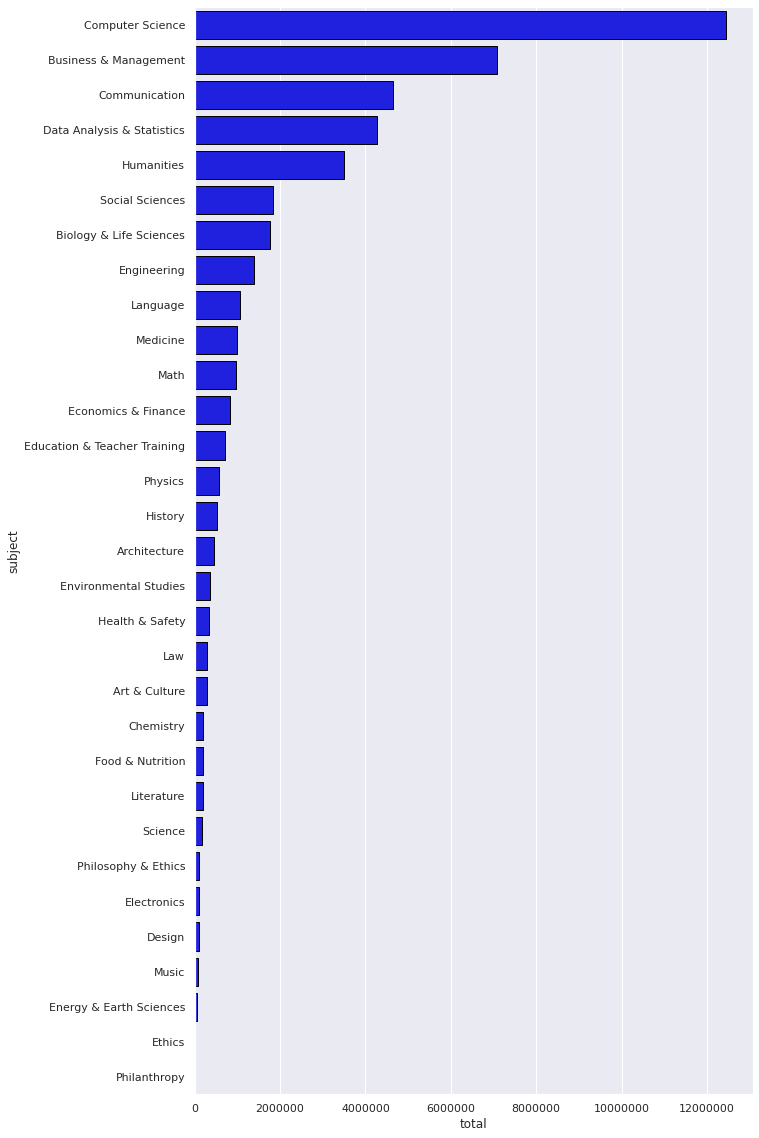

In [ ]:
# setting the dimensions of the plot
# depict visualization
fig, ax = plt.subplots()
sns.barplot(x = 'total', y = 'subject', data = stdquery, color = 'blue', edgecolor='black')
plt.ticklabel_format(style='plain', axis='x')

In [ ]:
data_analysis_query = pd.read_sql(''' SELECT title, price, course_effort, n_enrolled, institution 
                                      FROM edxcourses
                                      WHERE subject == 'Data Analysis & Statistics'
                                      ORDER BY price DESC LIMIT 15 ''', edx_conn)
data_analysis_query.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          15 non-null     object 
 1   price          15 non-null     float64
 2   course_effort  15 non-null     object 
 3   n_enrolled     15 non-null     int64  
 4   institution    15 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 728.0+ bytes


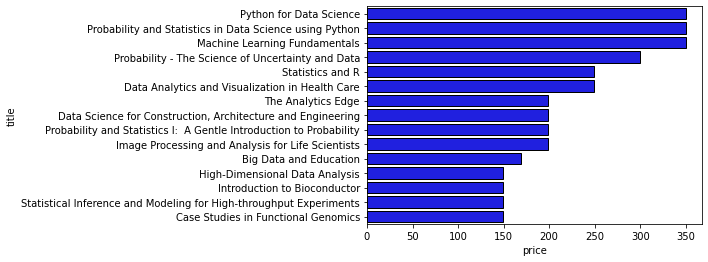

In [ ]:
sns.barplot(x = 'price', y = 'title', data = data_analysis_query, color = 'blue', edgecolor='black')

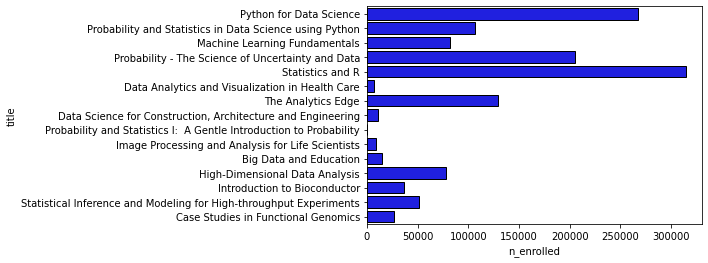

In [ ]:
sns.barplot(x = 'n_enrolled', y = 'title', data = data_analysis_query, color = 'blue', edgecolor='black')

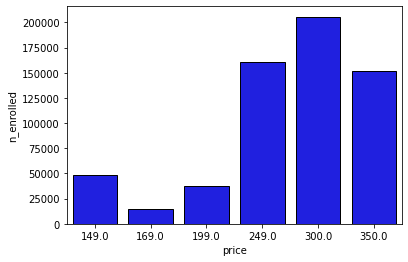

In [ ]:
sns.barplot(x = 'price', y = 'n_enrolled', data = data_analysis_query, color = 'blue', edgecolor = 'black', ci=False)

In [ ]:
data_analysis_python = pd.read_sql(''' SELECT title, price, course_effort, n_enrolled, institution
                                       FROM edxcourses
                                       WHERE title LIKE '%Python'
                                       ORDER BY price DESC  ''', edx_conn)
data_analysis_python.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          8 non-null      object 
 1   price          8 non-null      float64
 2   course_effort  8 non-null      object 
 3   n_enrolled     8 non-null      int64  
 4   institution    8 non-null      object 
dtypes: float64(1), int64(1), object(3)
memory usage: 448.0+ bytes


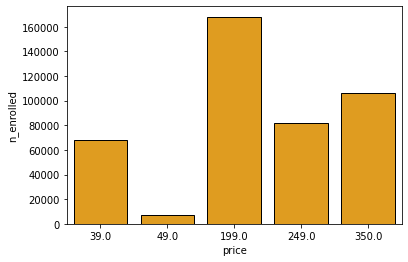

In [ ]:
sns.barplot(x = 'price', y = 'n_enrolled', data = data_analysis_python, color = 'orange', edgecolor='black', ci=False)

In [ ]:
data_analysis_prog = pd.read_sql(''' SELECT title, price, course_effort, n_enrolled, institution
                                       FROM edxcourses
                                       WHERE title LIKE '%Programming'
                                       ORDER BY price DESC  ''', edx_conn)
data_analysis_prog.head()

,title,price,course_effort,n_enrolled,institution
0,Basics of Computing and Programming,200.0,6–8 hours per week,37045,New York University
1,Object-Oriented Programming,149.0,6–8 hours per week,93633,IITBombay
2,Computing in Python I: Fundamentals and Proced...,99.0,9–10 hours per week,141966,The Georgia Institute of Technology
3,AI Chatbots without Programming,99.0,2–4 hours per week,35440,IBM


In [ ]:
data_analysis_stat = pd.read_sql(''' SELECT title, price, course_effort, n_enrolled, institution
                                     FROM edxcourses
                                     WHERE title LIKE '%Statistics'
                                     ORDER BY price DESC ''', edx_conn)
data_analysis_stat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          4 non-null      object 
 1   price          4 non-null      float64
 2   course_effort  4 non-null      object 
 3   n_enrolled     4 non-null      int64  
 4   institution    4 non-null      object 
dtypes: float64(1), int64(1), object(3)
memory usage: 288.0+ bytes


In [ ]:
data_analysis_prob = pd.read_sql(''' SELECT title, price, course_effort, n_enrolled, institution
                                     FROM edxcourses
                                     WHERE title LIKE '%Probability' AND title NOT LIKE '%MathTrackX: Probability'
                                     ORDER BY price DESC ''', edx_conn)
data_analysis_prob.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          4 non-null      object 
 1   price          4 non-null      float64
 2   course_effort  4 non-null      object 
 3   n_enrolled     4 non-null      int64  
 4   institution    4 non-null      object 
dtypes: float64(1), int64(1), object(3)
memory usage: 288.0+ bytes


In [ ]:
comp_sci_query = pd.read_sql(''' SELECT title, price, course_effort, n_enrolled, institution
                                 FROM edxcourses WHERE subject == 'Computer Science'
                                 ORDER BY price DESC LIMIT 15 ''', edx_conn)
comp_sci_query.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          15 non-null     object 
 1   price          15 non-null     float64
 2   course_effort  15 non-null     object 
 3   n_enrolled     15 non-null     int64  
 4   institution    15 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 728.0+ bytes


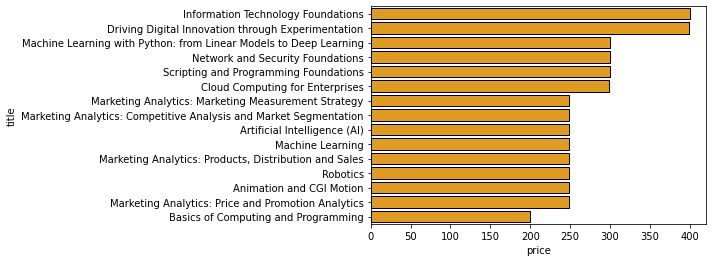

In [ ]:
sns.barplot(x = 'price', y = 'title', data = comp_sci_query, color = 'orange', edgecolor='black', ci=False)

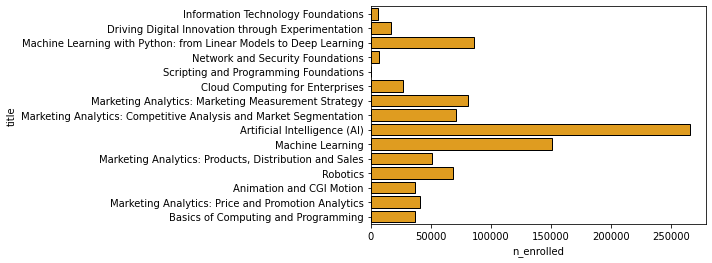

In [ ]:
sns.barplot(x = 'n_enrolled', y = 'title', data = comp_sci_query, color = 'orange', edgecolor='black', ci=False)

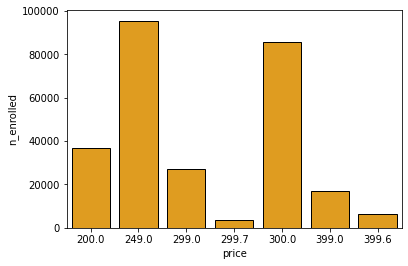

In [ ]:
sns.barplot(x = 'price', y = 'n_enrolled', data = comp_sci_query, color = 'orange', edgecolor='black', ci=False)

In [ ]:
data_analysis_tot = pd.read_sql(''' SELECT SUM(n_enrolled) AS total_program_enrollment, COUNT(title) AS num_courses, AVG(price) AS avg_course_purchase, MIN(price) AS min_course_purchase, MAX(price) AS max_course_purchase
                                    FROM edxcourses
                                    WHERE subject == 'Data Analysis & Statistics'
                                    ORDER BY price DESC ''', edx_conn)
data_analysis_tot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   total_program_enrollment  1 non-null      int64  
 1   num_courses               1 non-null      int64  
 2   avg_course_purchase       1 non-null      float64
 3   min_course_purchase       1 non-null      float64
 4   max_course_purchase       1 non-null      float64
dtypes: float64(3), int64(2)
memory usage: 168.0 bytes


In [ ]:
comp_sci_tot = pd.read_sql(''' SELECT SUM(n_enrolled) AS total_program_enrollment, COUNT(title) AS num_courses, AVG(price) AS avg_course_purchase, MIN(price) AS min_course_purchase, MAX(price) AS max_course_purchase
                               FROM edxcourses
                               WHERE subject == 'Computer Science'
                               ORDER BY price DESC ''', edx_conn)
comp_sci_tot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   total_program_enrollment  1 non-null      int64  
 1   num_courses               1 non-null      int64  
 2   avg_course_purchase       1 non-null      float64
 3   min_course_purchase       1 non-null      float64
 4   max_course_purchase       1 non-null      float64
dtypes: float64(3), int64(2)
memory usage: 168.0 bytes


In [ ]:
edx_tot = pd.read_sql(''' SELECT SUM(n_enrolled) AS total_edx_enrollment, COUNT(title) AS total_courses, AVG(price) AS total_avg
                          FROM edxcourses
                          ORDER BY price DESC ''', edx_conn)
edx_tot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_edx_enrollment  1 non-null      int64  
 1   total_courses         1 non-null      int64  
 2   total_avg             1 non-null      float64
dtypes: float64(1), int64(2)
memory usage: 152.0 bytes


In [ ]:
business_tot = pd.read_sql(''' SELECT SUM(n_enrolled) AS total_business_enrollment, COUNT(title) AS total_courses, AVG(price) AS avg_course_purchase, MIN(price) AS min_course_purchase, MAX(price) AS max_course_purchase 
                               FROM edxcourses
                               WHERE subject == 'Business & Management'
                               ORDER BY price DESC ''', edx_conn)
business_tot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   total_business_enrollment  1 non-null      int64  
 1   total_courses              1 non-null      int64  
 2   avg_course_purchase        1 non-null      float64
 3   min_course_purchase        1 non-null      float64
 4   max_course_purchase        1 non-null      float64
dtypes: float64(3), int64(2)
memory usage: 168.0 bytes


In [ ]:
engineering_tot = pd.read_sql(''' SELECT SUM(n_enrolled) AS total_engineering_enrollment, COUNT(title) AS total_courses, AVG(price) AS avg_course_purchase, MIN(price) AS min_course_purchase, MAX(price) AS max_course_purchase
                               FROM edxcourses
                               WHERE subject == 'Engineering'
                               ORDER BY price DESC ''', edx_conn)
engineering_tot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   total_engineering_enrollment  1 non-null      int64  
 1   total_courses                 1 non-null      int64  
 2   avg_course_purchase           1 non-null      float64
 3   min_course_purchase           1 non-null      float64
 4   max_course_purchase           1 non-null      float64
dtypes: float64(3), int64(2)
memory usage: 168.0 bytes


In [ ]:
ed_tot = pd.read_sql(''' SELECT SUM(n_enrolled) AS total_education_enrollment, COUNT(title) AS total_courses, AVG(price) AS avg_course_purchase, MIN(price) AS min_course_purchase, MAX(price) AS max_course_purchase
                               FROM edxcourses
                               WHERE subject == 'Education & Teacher Training'
                               ORDER BY price DESC ''', edx_conn)
ed_tot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   total_education_enrollment  1 non-null      int64  
 1   total_courses               1 non-null      int64  
 2   avg_course_purchase         1 non-null      float64
 3   min_course_purchase         1 non-null      float64
 4   max_course_purchase         1 non-null      float64
dtypes: float64(3), int64(2)
memory usage: 168.0 bytes


In [ ]:
law_tot = pd.read_sql(''' SELECT SUM(n_enrolled) AS total_law_enrollment, COUNT(title) AS total_courses, AVG(price) AS avg_course_purchase, MIN(price) AS min_course_purchase, MAX(price) AS max_course_purchase
                               FROM edxcourses
                               WHERE subject == 'Law'
                               ORDER BY price DESC ''', edx_conn)
law_tot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_law_enrollment  1 non-null      int64  
 1   total_courses         1 non-null      int64  
 2   avg_course_purchase   1 non-null      float64
 3   min_course_purchase   1 non-null      float64
 4   max_course_purchase   1 non-null      float64
dtypes: float64(3), int64(2)
memory usage: 168.0 bytes


In [ ]:
econ_tot = pd.read_sql(''' SELECT SUM(n_enrolled) AS total_economics_enrollment, COUNT(title) AS total_courses, AVG(price) AS avg_course_purchase, MIN(price) AS min_course_purchase, MAX(price) AS max_course_purchase
                               FROM edxcourses
                               WHERE subject == 'Economics & Finance'
                               ORDER BY price DESC ''', edx_conn)
econ_tot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   total_economics_enrollment  1 non-null      int64  
 1   total_courses               1 non-null      int64  
 2   avg_course_purchase         1 non-null      float64
 3   min_course_purchase         1 non-null      float64
 4   max_course_purchase         1 non-null      float64
dtypes: float64(3), int64(2)
memory usage: 168.0 bytes


In [ ]:
by_subject = pd.read_sql(''' SELECT subject, COUNT(subject) AS subject_count,
                             100 * COUNT(subject) / (SELECT COUNT(*) FROM edxcourses) AS subject_pct
                             FROM edxcourses
                             GROUP BY subject
                             ORDER BY subject_pct DESC LIMIT 10''', edx_conn)
by_subject.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   subject        10 non-null     object
 1   subject_count  10 non-null     int64 
 2   subject_pct    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [ ]:
by_subject_csv = by_subject.to_csv('by_subject_csv.csv')

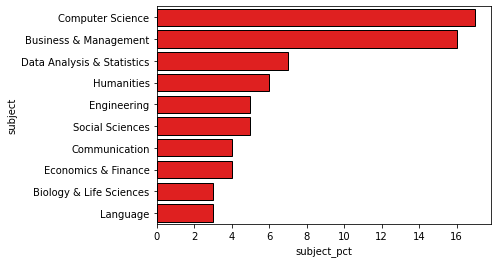

In [ ]:
sns.barplot(x = 'subject_pct', y = 'subject', data = by_subject, color = 'red', edgecolor='black', ci=False)

In [ ]:
edx_by_price = pd.read_sql(''' SELECT price, COUNT(price) AS price_count,
                           100 * COUNT(price) / (SELECT COUNT(*) FROM edxcourses) AS price_pct
                           FROM edxcourses
                           GROUP BY price
                           ORDER BY price_pct DESC LIMIT 10 ''', edx_conn)
edx_by_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        10 non-null     float64
 1   price_count  10 non-null     int64  
 2   price_pct    10 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 368.0 bytes


In [ ]:
edx_price_pct_csv = edx_by_price.to_csv('edx_price_pct.csv')

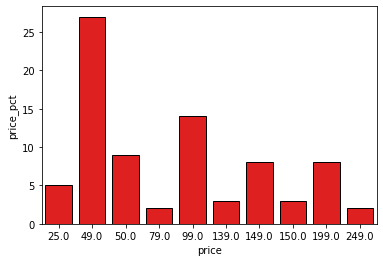

In [ ]:
sns.barplot(x = 'price', y = 'price_pct', data = edx_by_price, color = 'red', edgecolor='black', ci=False)

In [ ]:
by_course_effort = pd.read_sql(''' SELECT course_effort, COUNT(course_effort) AS num_hours, 
                                   100 * COUNT(course_effort) / (SELECT COUNT(*) FROM edxcourses) AS hours_pct
                                   FROM edxcourses 
                                   GROUP BY course_effort
                                   ORDER BY hours_pct DESC LIMIT 10 ''', edx_conn)
by_course_effort.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   course_effort  10 non-null     object
 1   num_hours      10 non-null     int64 
 2   hours_pct      10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


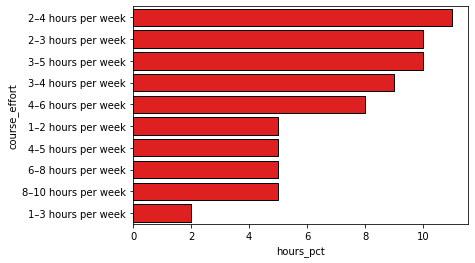

In [ ]:
sns.barplot(x = 'hours_pct', y = 'course_effort', data = by_course_effort, color = 'red', edgecolor='black', ci=False)

In [ ]:
by_institution = pd.read_sql(''' SELECT institution, COUNT(institution) AS institution_count,
                                 100 * COUNT(institution) / (SELECT COUNT(*) FROM edxcourses) AS institution_pct
                                 FROM edxcourses
                                 GROUP BY institution
                                 ORDER BY institution_pct DESC LIMIT 10''', edx_conn)
by_institution.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   institution        10 non-null     object
 1   institution_count  10 non-null     int64 
 2   institution_pct    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


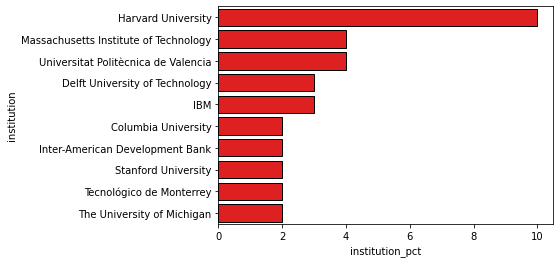

In [ ]:
sns.barplot(x = 'institution_pct', y = 'institution', data = by_institution, color = 'red', edgecolor='black', ci=False)

In [ ]:
by_institution_dsc = pd.read_sql(''' SELECT institution, COUNT(institution) AS institution_count,
                                 100 * COUNT(institution) / (SELECT COUNT(*) FROM edxcourses) AS institution_pct
                                 FROM edxcourses
                                 WHERe subject == 'Data Analysis & Statistics'
                                 GROUP BY institution
                                 ORDER BY institution_count DESC LIMIT 10''', edx_conn)
by_institution_dsc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   institution        10 non-null     object
 1   institution_count  10 non-null     int64 
 2   institution_pct    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


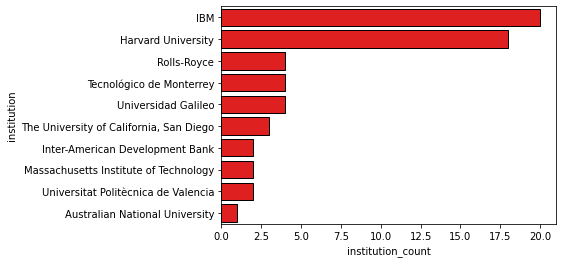

In [ ]:
sns.barplot(x = 'institution_count', y = 'institution', data = by_institution_dsc, color = 'red', edgecolor='black', ci=False)

In [ ]:
by_institution_comp_sci = pd.read_sql(''' SELECT institution, COUNT(institution) AS institution_count,
                                 100 * COUNT(institution) / (SELECT COUNT(*) FROM edxcourses) AS institution_pct
                                 FROM edxcourses
                                 WHERe subject == 'Computer Science'
                                 GROUP BY institution
                                 ORDER BY institution_count DESC LIMIT 10''', edx_conn)
by_institution_comp_sci.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   institution        10 non-null     object
 1   institution_count  10 non-null     int64 
 2   institution_pct    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


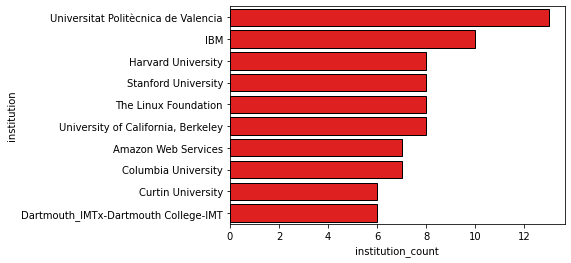

In [ ]:
sns.barplot(x = 'institution_count', y = 'institution', data = by_institution_comp_sci, color = 'red', edgecolor='black', ci=False)

In [ ]:
subject_hundred = pd.read_sql(''' SELECT subject, AVG(price) as avg_price_subject
                                  FROM edxcourses
                                  WHERE price > 100.0 
                                  GROUP BY subject
                                  ORDER BY avg_price_subject DESC LIMIT 10''', edx_conn)
subject_hundred = subject_hundred.round(2)
subject_hundred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   subject            10 non-null     object 
 1   avg_price_subject  10 non-null     float64
dtypes: float64(1), object(1)
memory usage: 288.0+ bytes


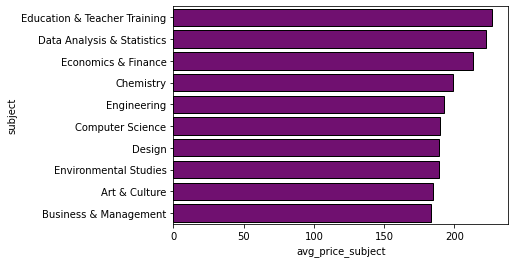

In [ ]:
sns.barplot(x = 'avg_price_subject', y = 'subject', data = subject_hundred, color = 'purple', edgecolor='black', ci=False)

In [ ]:
by_enroll = pd.read_sql(''' SELECT subject, SUM(n_enrolled) AS total_enrollment
                          FROM edxcourses 
                          GROUP BY subject
                          ORDER BY total_enrollment DESC LIMIT 10 ''', edx_conn)
by_enroll.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   subject           10 non-null     object
 1   total_enrollment  10 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 288.0+ bytes


In [ ]:
by_enroll_csv = by_enroll.to_csv('by_enroll.csv')

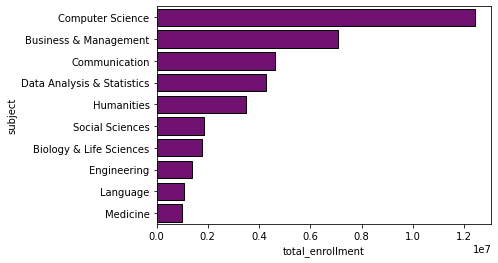

In [ ]:
sns.barplot(x = 'total_enrollment', y = 'subject', data = by_enroll, color = 'purple', edgecolor='black', ci=False)

In [ ]:
by_avg_enroll = pd.read_sql(''' SELECT subject, AVG(n_enrolled) AS avg_enrollment
                          FROM edxcourses 
                          GROUP BY subject
                          ORDER BY avg_enrollment DESC LIMIT 10 ''', edx_conn)
by_avg_enroll.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   subject         10 non-null     object 
 1   avg_enrollment  10 non-null     float64
dtypes: float64(1), object(1)
memory usage: 288.0+ bytes


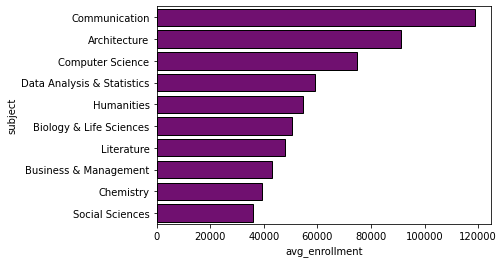

In [ ]:
sns.barplot(x = 'avg_enrollment', y = 'subject', data = by_avg_enroll, color = 'purple', edgecolor='black', ci=False)